# Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
import joblib

In [3]:
#Loading The Data
data=pd.read_csv("StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [4]:
#EDA
data.shape

(6607, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
data.Teacher_Quality.mode()[0]

'Medium'

In [8]:
data.Teacher_Quality=data.Teacher_Quality.fillna(data.Teacher_Quality.mode()[0])

In [9]:
data.Parental_Education_Level.mode()[0]

'High School'

In [10]:
data.Parental_Education_Level=data.Parental_Education_Level.fillna(data.Parental_Education_Level.mode()[0])

In [11]:
data.Distance_from_Home.unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [12]:
data.Distance_from_Home=data.Distance_from_Home.fillna(data.Distance_from_Home.mode()[0])

In [13]:
data.isna().sum().sum()

0

In [14]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [15]:
data.Hours_Studied.unique()

array([23, 19, 24, 29, 25, 17, 21,  9, 10, 14, 22, 15, 12, 20, 11, 13, 16,
       18, 31,  8, 26, 28,  4, 35, 27, 33, 36, 43, 34,  1, 30,  7, 32,  6,
       38,  5,  3,  2, 39, 37, 44], dtype=int64)

In [16]:
data.Attendance.unique()

array([ 84,  64,  98,  89,  92,  88,  78,  94,  80,  97,  83,  82,  68,
        60,  70,  75,  99,  74,  65,  62,  91,  90,  66,  69,  72,  63,
        61,  86,  77,  71,  67,  87,  73,  96, 100,  81,  95,  79,  85,
        76,  93], dtype=int64)

In [17]:
data.Attendance.min(),data.Attendance.max()

(60, 100)

In [18]:
data.Parental_Involvement.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [19]:
data.Access_to_Resources.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [20]:
data.Extracurricular_Activities.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data.Sleep_Hours.unique()

array([ 7,  8,  6, 10,  9,  5,  4], dtype=int64)

In [22]:
data.Previous_Scores.unique()

array([ 73,  59,  91,  98,  65,  89,  68,  50,  80,  71,  88,  87,  97,
        72,  74,  70,  82,  58,  99,  84, 100,  75,  54,  90,  94,  51,
        57,  66,  96,  93,  56,  52,  63,  79,  81,  69,  95,  60,  92,
        77,  62,  85,  78,  64,  76,  55,  86,  61,  53,  83,  67],
      dtype=int64)

In [23]:
data.Previous_Scores.min(),data.Previous_Scores.max()

(50, 100)

In [24]:
data.Motivation_Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [25]:
data.Internet_Access.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
data.Tutoring_Sessions.unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [27]:
data.Family_Income.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [28]:
data.Teacher_Quality.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [29]:
data.School_Type.unique()

array(['Public', 'Private'], dtype=object)

In [30]:
data.Peer_Influence.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [31]:
data.Physical_Activity.unique()

array([3, 4, 2, 1, 5, 0, 6], dtype=int64)

In [32]:
data.Previous_Scores.unique()

array([ 73,  59,  91,  98,  65,  89,  68,  50,  80,  71,  88,  87,  97,
        72,  74,  70,  82,  58,  99,  84, 100,  75,  54,  90,  94,  51,
        57,  66,  96,  93,  56,  52,  63,  79,  81,  69,  95,  60,  92,
        77,  62,  85,  78,  64,  76,  55,  86,  61,  53,  83,  67],
      dtype=int64)

In [33]:
data.Parental_Education_Level.unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [34]:
data.Learning_Disabilities.unique()

array(['No', 'Yes'], dtype=object)

In [35]:
data.Distance_from_Home.unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

In [36]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [37]:
data.Exam_Score.unique()

array([ 67,  61,  74,  71,  70,  66,  69,  72,  68,  65,  64,  60,  63,
        62, 100,  76,  79,  73,  78,  89,  75,  59,  86,  97,  83,  84,
        80,  58,  94,  55,  92,  82,  77, 101,  88,  91,  99,  87,  57,
        96,  98,  95,  85,  93,  56], dtype=int64)

In [38]:
#Data Visualizaton

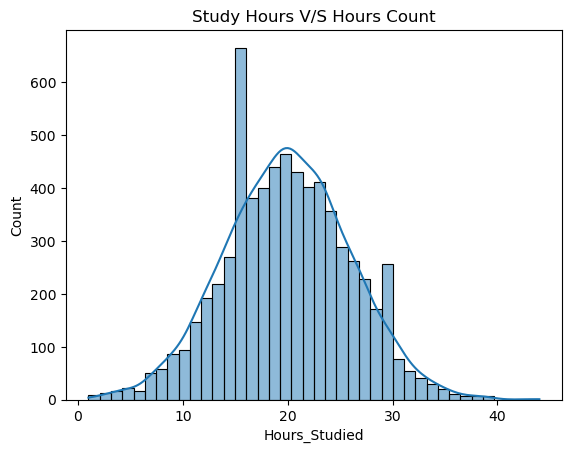

In [39]:
sns.histplot(x="Hours_Studied", data=data, kde=True, bins=40)
plt.title("Study Hours V/S Hours Count")
plt.show()

In [40]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

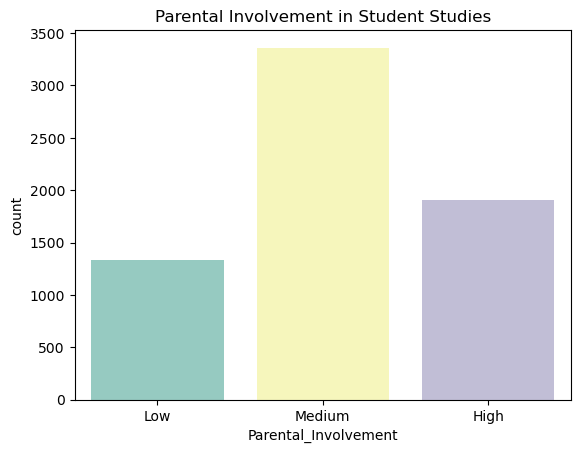

In [41]:
sns.countplot(x="Parental_Involvement", data=data, palette="Set3")
plt.title("Parental Involvement in Student Studies")
plt.show()


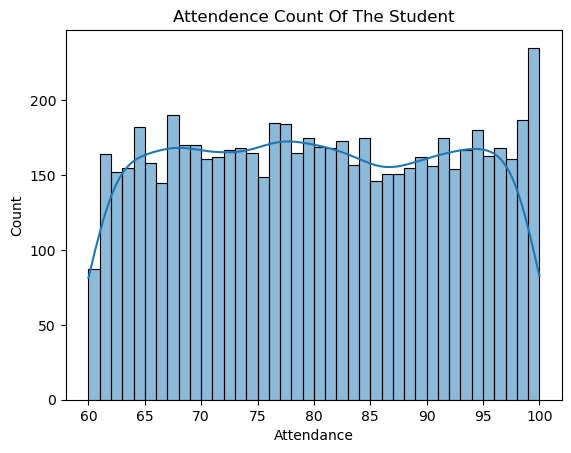

In [42]:
sns.histplot(data=data,x="Attendance",kde=True,bins=40)
plt.title("Attendence Count Of The Student")
plt.show()

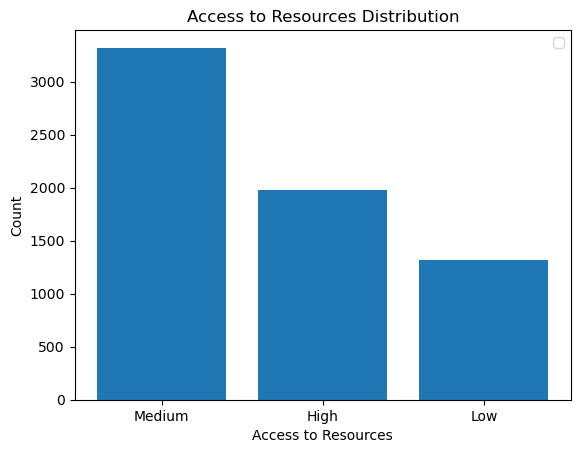

In [43]:
counts = data["Access_to_Resources"].value_counts()

plt.bar(x=counts.index, height=counts.values)
plt.title("Access to Resources Distribution")
plt.xlabel("Access to Resources")
plt.ylabel("Count")
plt.legend()
plt.show()


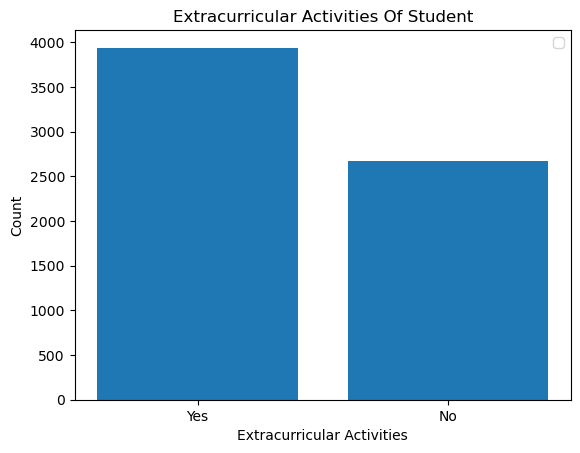

In [44]:
counts = data["Extracurricular_Activities"].value_counts()

plt.bar(x=counts.index, height=counts.values)
plt.title("Extracurricular Activities Of Student")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Count")
plt.legend()
plt.show()


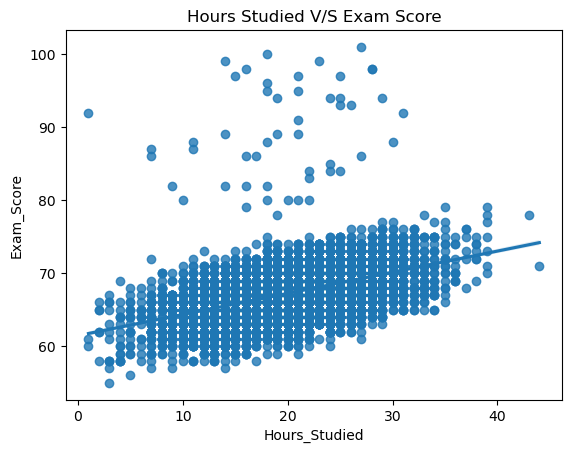

In [45]:
sns.regplot(data=data,x="Hours_Studied",y="Exam_Score")
plt.title("Hours Studied V/S Exam Score")
plt.show()

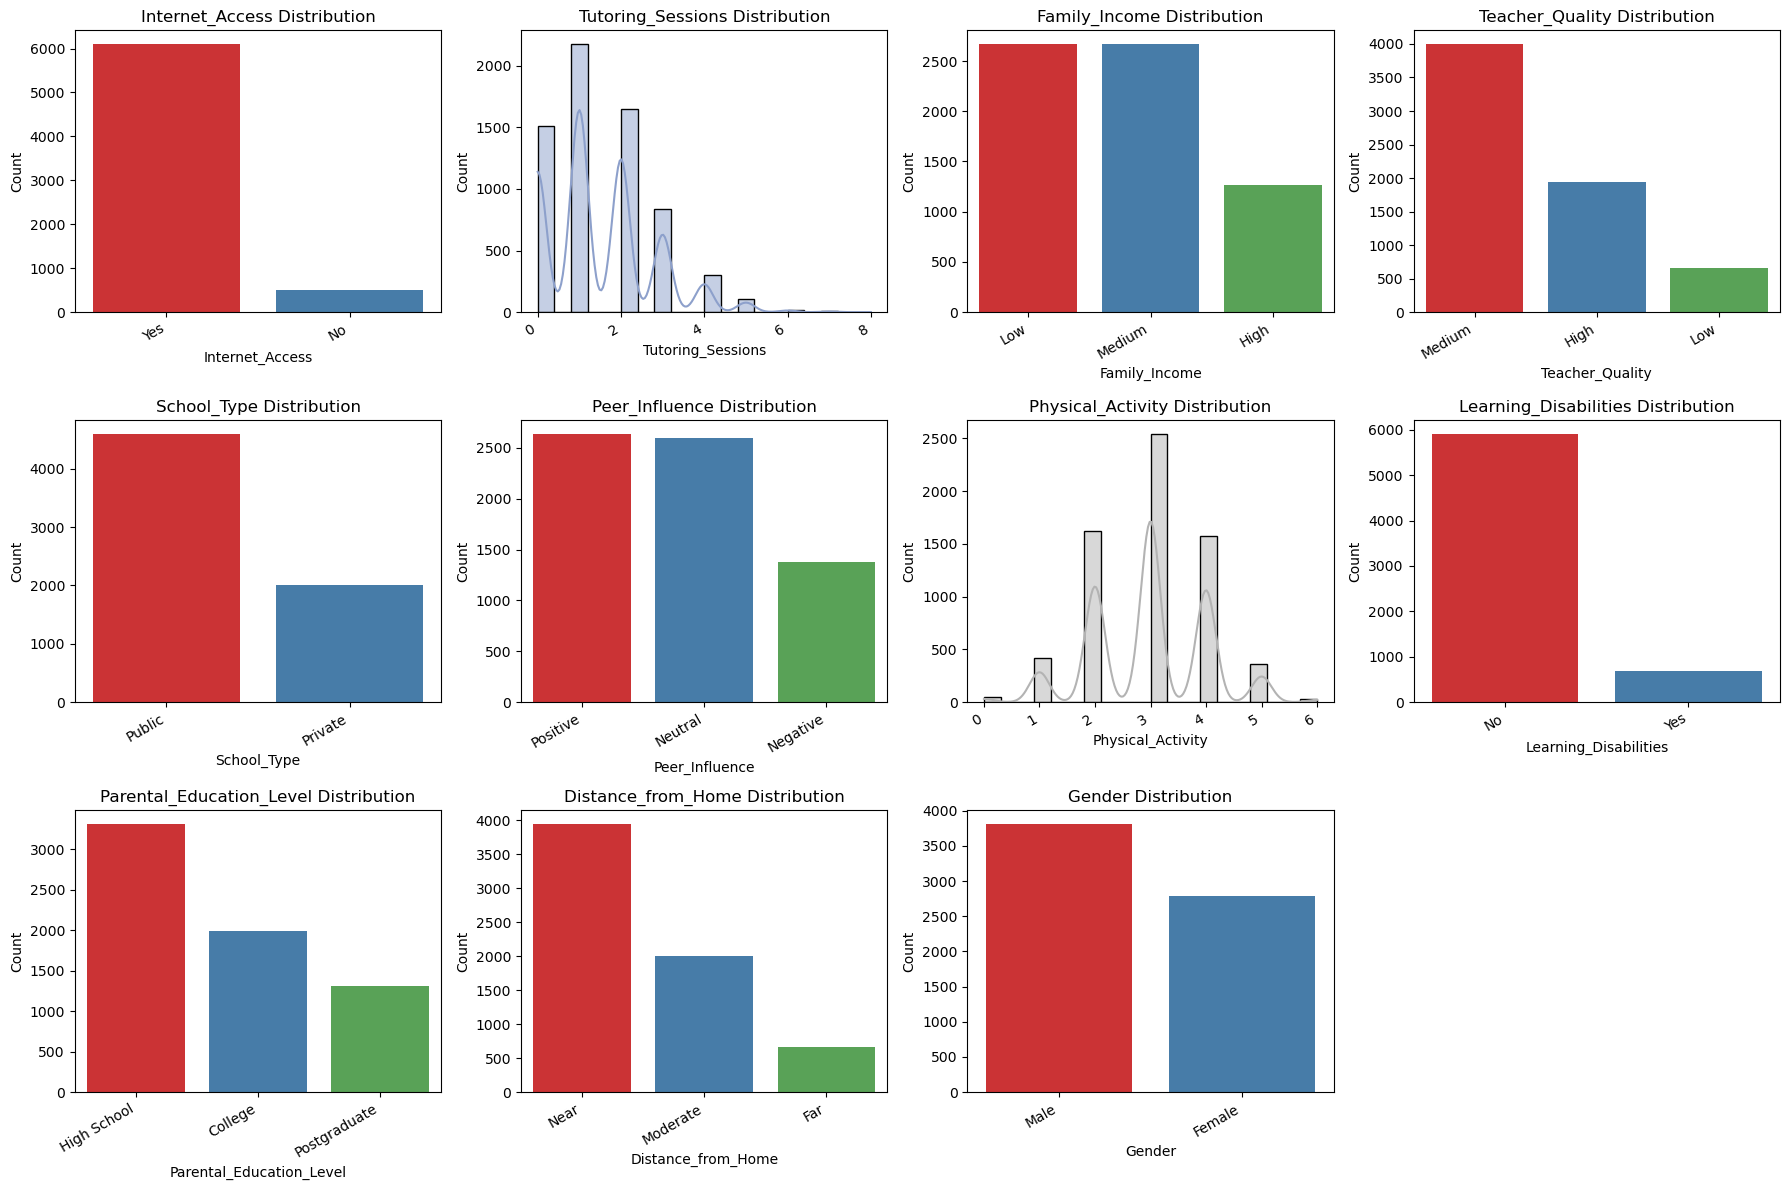

In [46]:
cols = [
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

plt.figure(figsize=(18,12))
palette = sns.color_palette("Set2", len(cols))  # define a palette

for i, col in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    
    if data[col].dtype == "object" or data[col].dtype == "bool":
        counts = data[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values, palette="Set1")
        plt.title(f"{col} Distribution")
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha="right")
    else:
        sns.histplot(data=data, x=col, bins=20, kde=True, color=palette[i % len(palette)])
        plt.title(f"{col} Distribution")
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha="right")

plt.tight_layout()
plt.show()

In [47]:
#Selecting Input And Output Features
X=data[['Hours_Studied']]
y=data["Exam_Score"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
# Building A Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)

# Prediction On Training Data

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Train set metrics
print("Train R2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", (mean_squared_error(y_train, y_train_pred)))


Train R2: 0.18535735136112363
Train MAE: 2.5359293418271447
Train RMSE: 12.815064452538435


# Prediction On Testing Data

In [54]:
# Test set metrics
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Test R2: 0.23319773654271314
Test MAE: 2.43610347015494
Test RMSE: 3.245896038389638


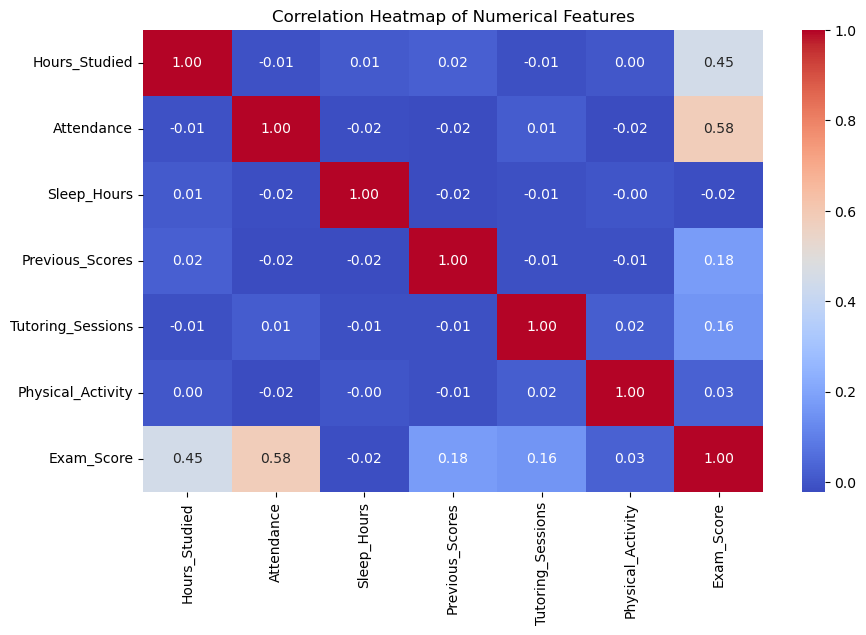

In [55]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [56]:
#Selecting Input And Output Features
X=data.drop("Exam_Score",axis=1)
y=data["Exam_Score"]

In [57]:
numerical_columns = X.select_dtypes(include=["int", "float"]).columns.to_list()
categorical_columns = X.select_dtypes(include=["object", "bool"]).columns.to_list()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
        ("numerical", StandardScaler(), numerical_columns),  
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
])


In [58]:
from sklearn.pipeline import Pipeline
pipeline1=Pipeline([
    ("preprocessor",preprocessor),
    ("model",LinearRegression())
])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
# Training Mutiple Linear Regression Model
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('model', LinearRegression())])

# Prediction On Training Data

In [62]:
y_train_pred=pipeline1.predict(X_train)

In [63]:
# Train set metrics
print("Train R2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

Train R2: 0.7094104836581603
Train MAE: 0.5118915069474481
Train RMSE: 2.138044780323361


# Prediction On Testing Data

In [65]:
y_test_pred=pipeline1.predict(X_test)

In [66]:
# Test set metrics
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Test R2: 0.7735486073760678
Test MAE: 0.45342392760337874
Test RMSE: 1.7639261989401633


# Applying Ridge Regression

In [68]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [69]:
numerical_columns = X.select_dtypes(include=["int", "float"]).columns.to_list()
categorical_columns = X.select_dtypes(include=["object", "bool"]).columns.to_list()

ridge_pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("Ridge",Ridge(max_iter=10000))
])

parameter_grid={
        "Ridge__alpha":  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}



grid_search = GridSearchCV(ridge_pipeline, param_grid=parameter_grid, cv=5, scoring="neg_mean_squared_error")


grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_)


Best Alpha: {'Ridge__alpha': 10}


In [70]:
y_train_ridge_pred=best_ridge_model.predict(X_train)

In [76]:
# Train set metrics
print("Train R2:", r2_score(y_train,y_train_ridge_pred)),
print("Train MAE:", mean_absolute_error(y_train,y_train_ridge_pred)),
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_train_ridge_pred)))

Train R2: 0.7094041788427534
Train MAE: 0.5111694764980924
Train RMSE: 2.1380679743888673


In [78]:
y_test_ridge_pred=best_ridge_model.predict(X_test)

In [80]:
# Test set metrics
print("Test R2:", r2_score(y_test,y_test_ridge_pred)),
print("Test MAE:", mean_absolute_error(y_test,y_test_ridge_pred)),
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_test_ridge_pred)))

Test R2: 0.773761937592675
Test MAE: 0.4524548277271261
Test RMSE: 1.7630951432790196


# Applying Lasso Regression

In [ ]:
#Selecting Input And Output Features
X=data.drop("Exam_Score",axis=1)
y=data["Exam_Score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
numerical_columns = X.select_dtypes(include=["int", "float"]).columns.to_list()
categorical_columns = X.select_dtypes(include=["object", "bool"]).columns.to_list()

lasso_pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("lasso",Lasso(max_iter=10000))
])

parameter_grid={
        "lasso__alpha":  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}



grid_search = GridSearchCV(lasso_pipeline, param_grid=parameter_grid, cv=5, scoring="neg_mean_squared_error")


grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_)


Best Alpha: {'lasso__alpha': 0.001}


# Prediction On Training Data

In [85]:
y_train_lasso_pred=best_model.predict(X_train)

In [86]:
# Train set metrics
print("Train R2:", r2_score(y_train,y_train_lasso_pred))
print("Train MAE:", mean_absolute_error(y_train,y_train_lasso_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_train_lasso_pred)))

Train R2: 0.7094110053798671
Train MAE: 0.5110735952309096
Train RMSE: 2.138042861009673


In [87]:
y_test_lasso_pred=best_model.predict(X_test)

In [88]:
# Test set metrics
print("Test R2:", r2_score(y_test,y_test_lasso_pred))
print("Test MAE:", mean_absolute_error(y_test,y_test_lasso_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_test_lasso_pred)))


Test R2: 0.7737320563313659
Test MAE: 0.4524091224177852
Test RMSE: 1.7632115732171325


# Adding Polynomial Features

In [95]:
#Selecting Input And Output Features
X=data.drop("Exam_Score",axis=1)
y=data["Exam_Score"]

In [97]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
numerical_columns = X.select_dtypes(include=["int","float"]).columns.to_list()
categorical_columns = X.select_dtypes(include=["object","bool"]).columns.to_list()

from sklearn.preprocessing import PolynomialFeatures
pipeline_poly = Pipeline([
    ("preprocessor", preprocessor),
    ("polynomial", PolynomialFeatures(inter)),
    ("linear_regression", LinearRegression())
])

param_grid = {
    "polynomial__degree": [1, 2, 3]
}

grid_search = GridSearchCV(
    pipeline_poly,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

grid_search.fit(X_train, y_train)

print("Best degree:", grid_search.best_params_["polynomial__degree"])


Best degree: 1


In [116]:
y_train_pred=grid_search.predict(X_train)

In [118]:
# Train set metrics
print("Train R2:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

Train R2: 0.710402845996602
Train MAE: 0.5089095331563488
Train RMSE: 2.1386496458349047


In [122]:
y_test_pred=grid_search.predict(X_test)

In [124]:
# Test set metrics
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Test R2: 0.76509879999441
Test MAE: 0.46359360671710226
Test RMSE: 1.800010982423371


In [154]:
# Function for interactive prediction using the saved polynomial regression model
# This applies all preprocessing, polynomial features, and predicts the exam score

def predict_score_interactive(model_path="Student_Exam_Prediction_Model.pkl"):
    """
    Ask user for feature inputs and predict the target score using a saved polynomial regression pipeline.
    """
    # Load the saved model
    model = joblib.load(model_path)
    
    # Get feature names from the pipeline preprocessor
    preprocessor = model.named_steps['preprocessor']
    numerical_features = preprocessor.transformers_[0][2]  # numerical column names
    categorical_features = preprocessor.transformers_[1][2]  # categorical column names
    
    # Dictionary to store user inputs
    user_input = {}
    
    print("Please enter the following information:")
    
    # Ask for numerical inputs
    for feature in numerical_features:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_input[feature] = value
                break
            except ValueError:
                print("Please enter a valid number.")
    
    # Ask for categorical inputs
    for feature in categorical_features:
        value = input(f"{feature}: ")
        user_input[feature] = value
    
    # Convert to DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Predict
    prediction = model.predict(input_df)
    

    rounded_prediction = round(prediction[0], 1)  
    print(f"\nPredicted Score: {rounded_prediction}")



In [158]:
predict_score_interactive()

Please enter the following information:


Hours_Studied:  23
Attendance:  84
Sleep_Hours:  7
Previous_Scores:  73
Tutoring_Sessions:  0
Physical_Activity:  3
Parental_Involvement:  Low
Access_to_Resources:  High
Extracurricular_Activities:  No
Motivation_Level:  Low
Internet_Access:  Yes
Family_Income:  Low
Teacher_Quality:  Medium
School_Type:  Public
Peer_Influence:  Positive
Learning_Disabilities:  No
Parental_Education_Level:  High School
Distance_from_Home:  Near
Gender:  Male



Predicted Score: 67.2


In [126]:
joblib.dump(grid_search.best_estimator_,"Student_Exam_Prediction_Model.pkl")

['Student_Exam_Prediction_Model.pkl']